In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ages = np.hstack((np.array([1000, 1000, 1000]), np.arange(5, 105, 5)))
ages = np.array([15, 20, 20, 25, 30, 35, 40])

np.random.shuffle(ages)

Mean – average value  
Median – middle value (sorted)  
Mode – most frequent value  
Variance – average squared distance from mean  
Std Dev – spread, square root of variance

In [3]:
mean = np.mean(ages)
median = np.median(ages)
mode = np.argmax(np.bincount(ages))
variance = np.var(ages)
std_dev = np.std(ages)

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean: 26.43
Median: 25.00
Mode: 20.00
Variance: 69.39
Standard Deviation: 8.33


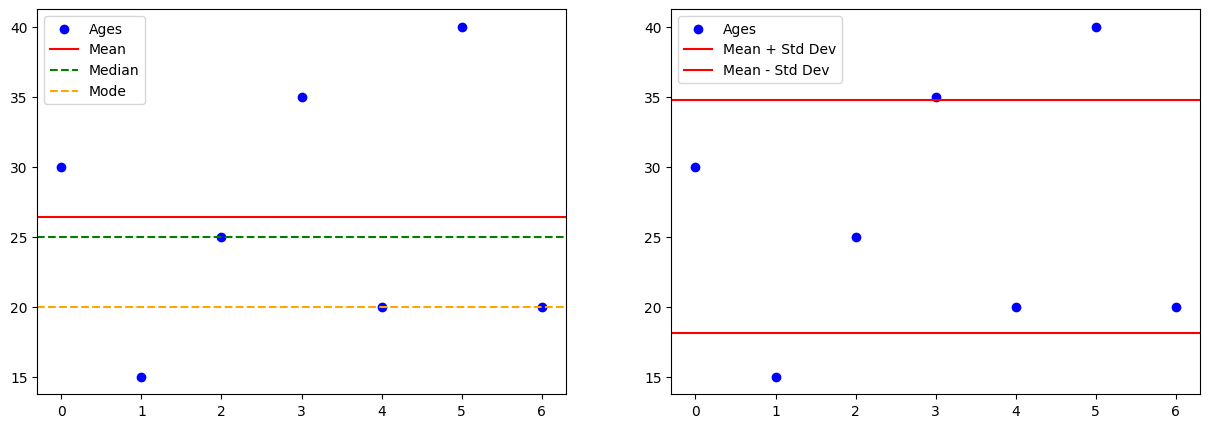

In [4]:
def plot_stats():
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

  # First plot
  ax1.scatter(range(len(ages)), ages, label='Ages', color='blue')
  ax1.axhline(mean, color='red', label='Mean')
  ax1.axhline(median, color='green', linestyle='--', label='Median')
  ax1.axhline(mode, color='orange', linestyle='--', label='Mode')
  ax1.legend()

  # Second plot
  ax2.scatter(range(len(ages)), ages, label='Ages', color='blue')
  ax2.axhline(mean + std_dev, color='red', label='Mean + Std Dev')
  ax2.axhline(mean - std_dev, color='red', label='Mean - Std Dev')
  # ax2.axhline(mean + variance, color='green', linestyle='--', label='Mean + Variance')
  # ax2.axhline(mean - variance, color='green', linestyle='--', label='Mean - Variance')
  ax2.legend()


plot_stats()

## Sum Squared Residuals - shows total prediction error

Residual = actual value minus predicted value  
Prediction = whatever we predicted  
Sum Squared Residuals = how wrong we were (add all squared residuals)  
Mean Squared Error (MSE) = average of squared residuals

In [5]:
ages_actual = np.array([15, 20, 25])
ages_predicted = np.array([12, 22, 28])

ages_actual = np.array([15, 20, 20, 20, 25, 30, 35, 40, 40, 45, 50])
# ages_predicted = np.array([15, 20, 20, 20, 25, 30, 35, 40, 40, 45, 60])
ages_predicted = np.array([12, 22, 28, 20, 30, 35, 40, 35, 40, 45, 30])

# ages_predicted = np.array([np.mean(ages_actual)] * len(ages_actual))

In [6]:
# Shuffle the arrays
ages = np.array([ages_actual, ages_predicted])
ages = ages.T
np.random.shuffle(ages)
ages_actual, ages_predicted = ages.T
print(f"Ages Actual: {ages_actual}")
print(f"Ages Predicted: {ages_predicted}")

Ages Actual: [20 20 15 35 25 20 30 50 45 40 40]
Ages Predicted: [22 20 12 40 30 28 35 30 45 40 35]


In [7]:
residuals = ages_actual - ages_predicted
squared_residuals = residuals ** 2
sum_squared_residuals = np.sum(squared_residuals)
mean_squared_error = np.mean(squared_residuals)

print(f"Residuals: {residuals}")
print(f"Squared Residuals: {squared_residuals}")
print(f"Sum of Squared Residuals: {sum_squared_residuals:.2f}")
print(f"Mean Squared Error: {mean_squared_error:.2f}")

Residuals: [-2  0  3 -5 -5 -8 -5 20  0  0  5]
Squared Residuals: [  4   0   9  25  25  64  25 400   0   0  25]
Sum of Squared Residuals: 577.00
Mean Squared Error: 52.45


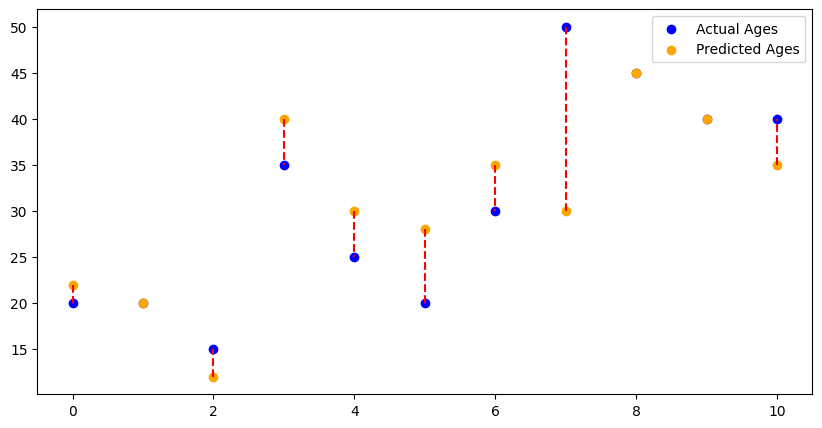

In [8]:
def plot_residuals():
  plt.figure(figsize=(10, 5))

  # Plotting the actual vs predicted values
  plt.scatter(range(len(ages_actual)), ages_actual, label='Actual Ages', color='blue')
  plt.scatter(range(len(ages_predicted)), ages_predicted, label='Predicted Ages', color='orange')

  # Plotting the residuals
  for i in range(len(ages_actual)):
    plt.plot([i, i], [ages_predicted[i], ages_actual[i]], color='red', linestyle='--')

  plt.legend()


plot_residuals()